In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
df = pd.read_csv('original.csv', header=0)
df

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006,1
502,20.6,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903,1
503,23.9,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572,1
504,22.0,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694,1


In [0]:
df.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,0
3,33.4,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,0
4,36.2,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [0]:
df.describe()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,0.454545
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,0.498422
min,5.000000,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,1.000000


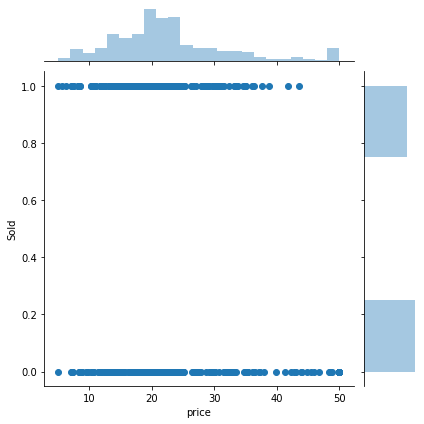

In [0]:
sns.jointplot(x='price', y='Sold', data=df)

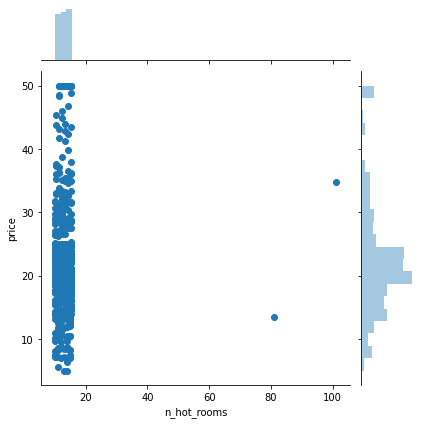

In [0]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

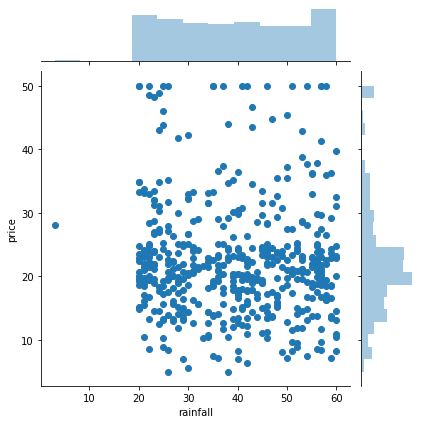

In [0]:
sns.jointplot(x="rainfall", y="price", data=df)

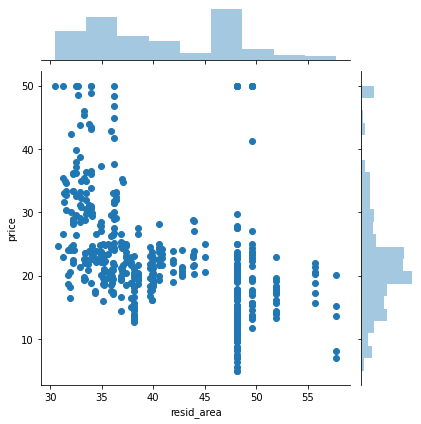

In [0]:
sns.jointplot(x="resid_area", y="price", data=df)

In [0]:
np.percentile(df.n_hot_rooms,[99])[0]

15.399519999999999

In [0]:
uv = np.percentile(df.n_hot_rooms,[99])[0]

In [0]:
df[(df.n_hot_rooms>uv)]

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
2,34.7,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764,0
166,50.0,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105,0
204,50.0,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178,0
267,50.0,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235,0
369,50.0,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477,0
423,13.4,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344,0


In [0]:
df.n_hot_rooms[(df.n_hot_rooms> 3*uv)] = 3*uv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
lv = np.percentile(df.rainfall,[1])[0]
df.rainfall[(df.rainfall <0.3*lv)] = 0.3*lv
df[(df.rainfall< lv)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
213,28.1,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,6,YES,0.044019,1


In [0]:
df['avg_dist'] = (df.dist1+df.dist2+df.dist3+df.dist4)/4

In [0]:
del df['dist1']

In [0]:
del df['dist2']
del df['dist3']
del df['dist4']
del df['bus_ter']

In [0]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,Sold,avg_dist
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.19200,River,23,0.049347,0,4.0875
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.17280,Lake,42,0.046146,1,4.9675
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,46.19856,None,38,0.045764,0,4.9675
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.26720,Lake,45,0.047151,0,6.0650
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.28960,Lake,55,0.039474,0,6.0625


In [0]:
df = pd.get_dummies(df)
del df['waterbody_None']
del df['parks']
df.head()
df.corr()

In [0]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,6.0625,0,1,0,0


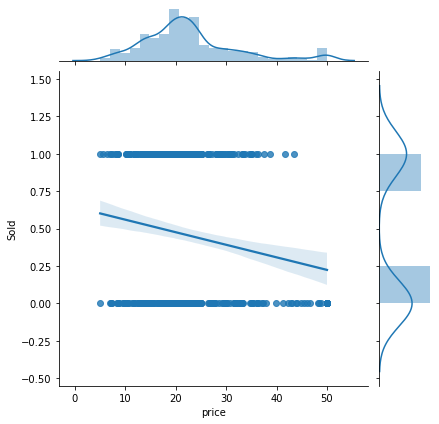

In [0]:
sns.jointplot(x = df['price'], y = df['Sold'], data =df, kind = 'reg')

In [0]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0,6.0625,0,1,0,0


In [0]:
x_multi = df.drop("Sold",axis=1)
x_multi.describe()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,23.569336,12.864050,39.187747,3.795104,0.551383,0.191700,0.140316,0.361660
std,9.182176,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,123.761830,2.688778,12.497221,2.105859,0.497845,0.394028,0.347659,0.480957
min,5.000000,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,6.000000,1.127500,0.000000,0.000000,0.000000,0.000000
25%,17.025000,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.659000,11.189800,28.000000,2.100625,0.000000,0.000000,0.000000,0.000000
50%,21.200000,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,8.018000,12.720000,39.000000,3.207500,1.000000,0.000000,0.000000,0.000000
75%,25.000000,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.155000,14.170800,50.000000,5.187500,1.000000,0.000000,0.000000,1.000000
max,50.000000,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,999.000000,46.198560,60.000000,12.127500,1.000000,1.000000,1.000000,1.000000


In [0]:
y_multi = df['Sold']
y_multi

0      0
1      1
2      0
3      0
4      0
      ..
501    1
502    1
503    1
504    1
505    1
Name: Sold, Length: 506, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
x_train_full,x_test,y_train_full,y_test =train_test_split(x_multi,y_multi,test_size=0.2,random_state=42)

x_valid, x_train = x_train_full[:202], x_train_full[202:]
y_valid, y_train = y_train_full[:202], y_train_full[202:]

x_valid.shape[0]!=y_valid.shape[0]

False

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

array([[ 0.06000617, -1.00241041, -0.38612595,  0.10104838,  0.56273083,
         0.76377407, -0.48253412, -0.14653631, -1.50355173,  1.64801907,
        -0.57184501,  0.86103386, -0.4578    , -0.41763453, -0.76847328],
       [ 1.00146214, -0.65456315, -0.94281503,  0.57629015, -1.28277504,
         0.32107002, -1.28257899, -0.14149713, -0.2536519 , -0.64130882,
         0.12483491, -1.16139451, -0.4578    , -0.41763453,  1.30128142],
       [-1.00983017,  2.48932757,  0.48867118, -0.50064661,  1.09259286,
        -0.78569012,  0.8286102 , -0.16471888,  0.86295105,  0.70071098,
        -0.95118906, -1.16139451, -0.4578    , -0.41763453, -0.76847328]])

In [0]:

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])
df.info()
print(tf.__version__)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   resid_area                506 non-null    float64
 2   air_qual                  506 non-null    float64
 3   room_num                  506 non-null    float64
 4   age                       506 non-null    float64
 5   teachers                  506 non-null    float64
 6   poor_prop                 506 non-null    float64
 7   n_hos_beds                506 non-null    float64
 8   n_hot_rooms               506 non-null    float64
 9   rainfall                  506 non-null    int64  
 10  Sold                      506 non-null    int64  
 11  avg_dist                  506 non-null    float64
 12  airport_YES               506 non-null    uint8  
 13  waterbody_Lake            506 non-null    uint8  
 14  waterbody_

In [0]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['accuracy'])
x_train.shape

(202, 15)

In [0]:
model_history = model.fit(x_train, y_train, epochs=80,validation_data=(x_valid, y_valid))

Epoch 1/80
7/7 [==============================] - 0s 16ms/step - loss: 0.2422 - accuracy: 0.6188 - val_loss: 0.2568 - val_accuracy: 0.5792
Epoch 2/80
7/7 [==============================] - 0s 7ms/step - loss: 0.2406 - accuracy: 0.6188 - val_loss: 0.2563 - val_accuracy: 0.5693
Epoch 3/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2479 - accuracy: 0.6188 - val_loss: 0.2562 - val_accuracy: 0.5743
Epoch 4/80
7/7 [==============================] - 0s 7ms/step - loss: 0.2314 - accuracy: 0.6139 - val_loss: 0.2561 - val_accuracy: 0.5743
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2425 - accuracy: 0.6139 - val_loss: 0.2558 - val_accuracy: 0.5743
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.2302 - accuracy: 0.6188 - val_loss: 0.2556 - val_accuracy: 0.5743
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.2281 - accuracy: 0.6139 - val_loss: 0.2555 - val_accuracy: 0.5743
Epoch 8/80
7/7 [=================

In [0]:
mae_test = model.evaluate(x_test, y_test)


4/4 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.6471


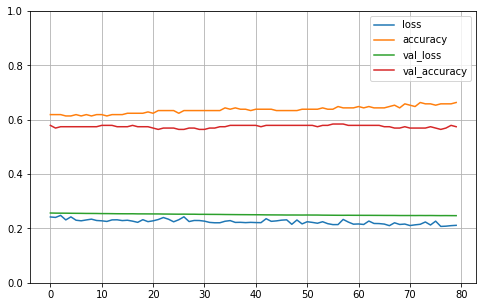

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [0]:
x_new = x_test[:3]

In [0]:
y_pred = model.predict(x_test[:3])
print (y_pred)
x_test[0:3]

[[0.6515901 ]
 [0.46739528]
 [0.6331557 ]]


array([[ 0.08587867, -1.00711147, -0.39541229,  0.14128239,  0.55591643,
         0.77195078, -0.48121032, -0.11781471, -1.0934198 ,  1.61417856,
        -0.54528264,  0.86978258, -0.50463688, -0.3927922 , -0.74420841],
       [ 1.03259453, -0.66439105, -0.93131473,  0.62394249, -1.27525438,
         0.32270256, -1.25709448, -0.11181445, -0.2144464 , -0.7057081 ,
         0.12764928, -1.14971261, -0.50463688, -0.3927922 ,  1.34370962],
       [-0.9899348 ,  2.43316256,  0.44672012, -0.46980481,  1.08166274,
        -0.80041799,  0.79033849, -0.13946511,  0.57078795,  0.65422546,
        -0.91169584, -1.14971261, -0.50463688, -0.3927922 , -0.74420841]])